In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
data_dict = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [4]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")
display(train.head())
display(test.head())

Train shape: (3960, 82), Test shape: (20, 59)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

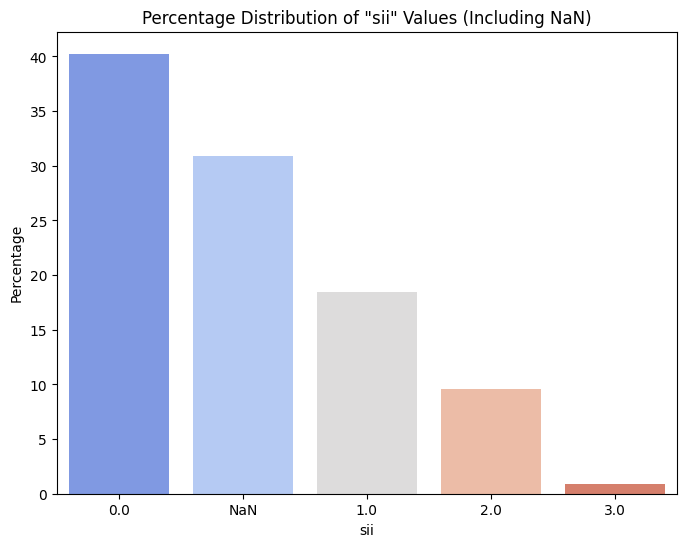

In [6]:
# Calculate value counts and percentages for 'sii' including NaN values
sii_counts = train['sii'].value_counts(dropna=False) 
sii_percentage = (sii_counts / len(train)) * 100

# Prepare data for visualization
sii_percentage_df = sii_percentage.reset_index()
sii_percentage_df.columns = ['sii', 'Percentage']

# Convert NaN to a string for better visualization
sii_percentage_df['sii'] = sii_percentage_df['sii'].fillna('NaN')

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=sii_percentage_df, x='sii', y='Percentage', palette='coolwarm')
plt.title('Percentage Distribution of "sii" Values (Including NaN)')
plt.xlabel('sii')
plt.ylabel('Percentage')
plt.show()

 # finding the missing values

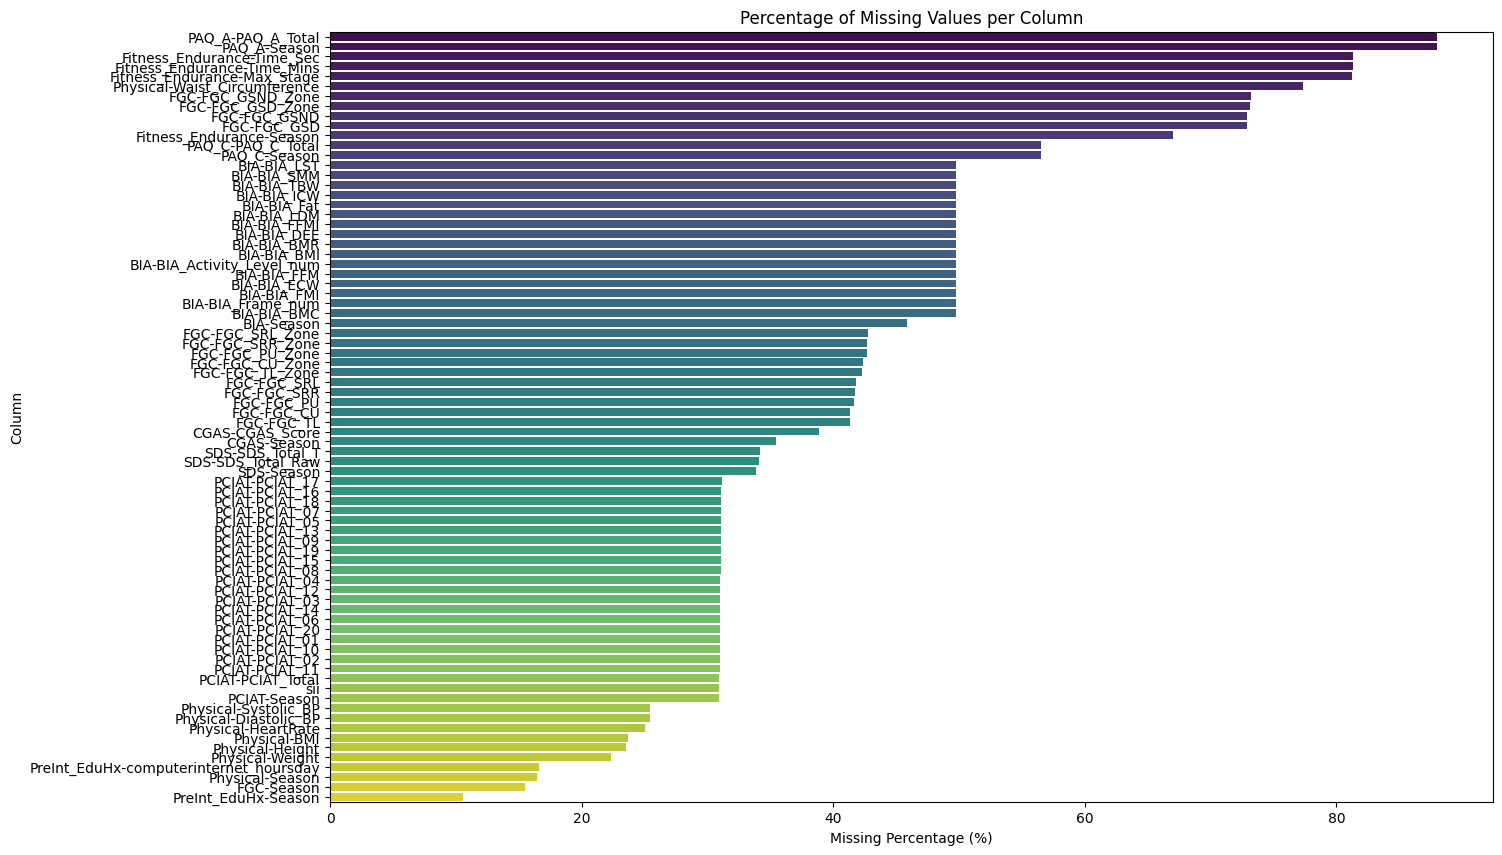

In [7]:
# Calculate missing values
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Percentage': missing_percentage
})
missing_data = missing_data[missing_data['Missing_Percentage'] > 0].sort_values(by='Missing_Percentage', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(
    data=missing_data,
    x='Missing_Percentage',
    y='Column',
    palette='viridis'
)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Missing Percentage (%)')
plt.show()

In [8]:
print('Columns missing in test:')
print([f for f in train.columns if f not in test.columns])

Columns missing in test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']


# dropping the picat and pciat columns as there are many missing values in it


In [9]:
PCIAT_cols = [val for val in train.columns[train.columns.str.contains('PCIAT')]]
PCIAT_cols.remove('PCIAT-PCIAT_Total')
train = train.drop(columns = PCIAT_cols)
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,Fall,2.340,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,Summer,2.170,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,Winter,2.451,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gender distribution  (Boy-0 , Girl-1)

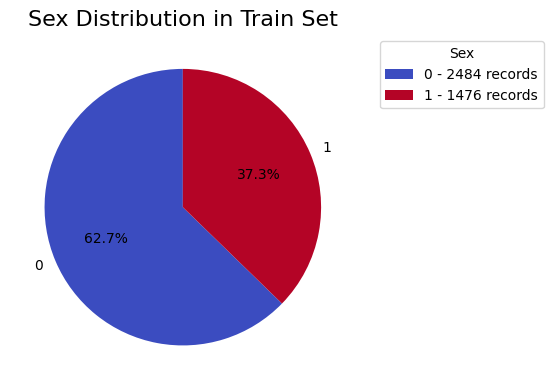

In [10]:
gender_records = train['Basic_Demos-Sex'].value_counts()

sex_counts = train['Basic_Demos-Sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))

sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', ylabel='')
plt.title('Sex Distribution in Train Set', fontsize=16)
plt.legend(title='Sex', labels=[f'{label} - {count} records' for label, count in gender_records.items()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Age Distribution

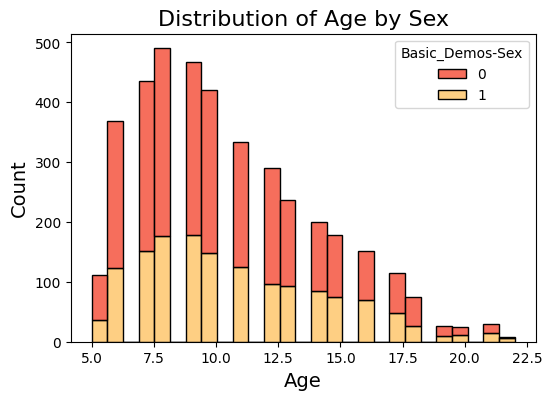

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=train, x='Basic_Demos-Age', hue='Basic_Demos-Sex', multiple='stack', palette='YlOrRd_r')
plt.title('Distribution of Age by Sex', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

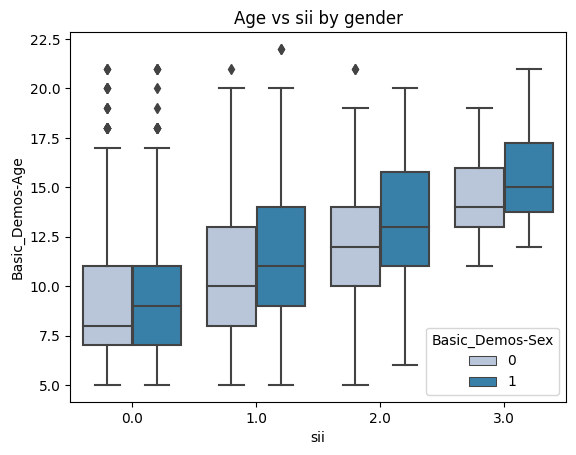

In [12]:
sns.boxplot(data=train, y=train['Basic_Demos-Age'], x=train['sii'], hue=train['Basic_Demos-Sex'],  palette = 'PuBu')
plt.title('Age vs sii by gender')
plt.show()

The above box plots shows that as the age increases sii also increases (severity impairment index)

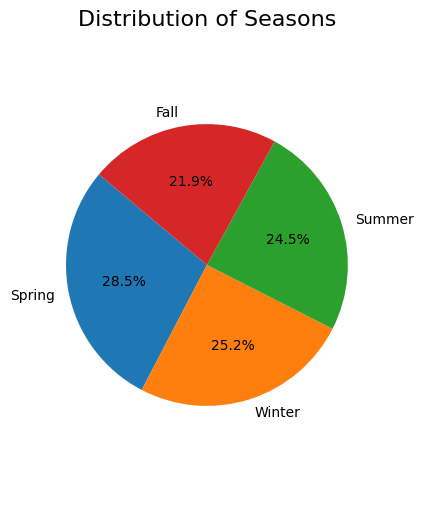

In [13]:
season_counts = train['Basic_Demos-Enroll_Season'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

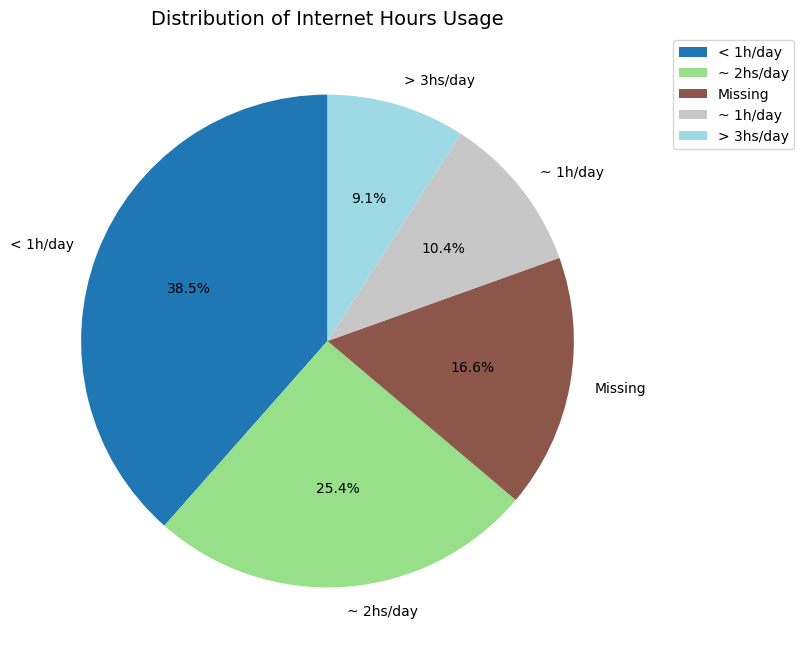

In [14]:
legend_mapping = {
    0: '< 1h/day',
    1: '~ 1h/day',
    2: '~ 2hs/day',
    3: '> 3hs/day',
    'NaN': 'Missing'
}

value_nan = train['PreInt_EduHx-computerinternet_hoursday'].value_counts(dropna=False)
    
value_nan.index = value_nan.index.fillna('NaN')
value_nan.index = value_nan.index.map(legend_mapping)
    
plt.figure(figsize=(8, 8))
value_nan.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title('Distribution of Internet Hours Usage', fontsize=14)
plt.ylabel('') 
plt.legend(value_nan.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

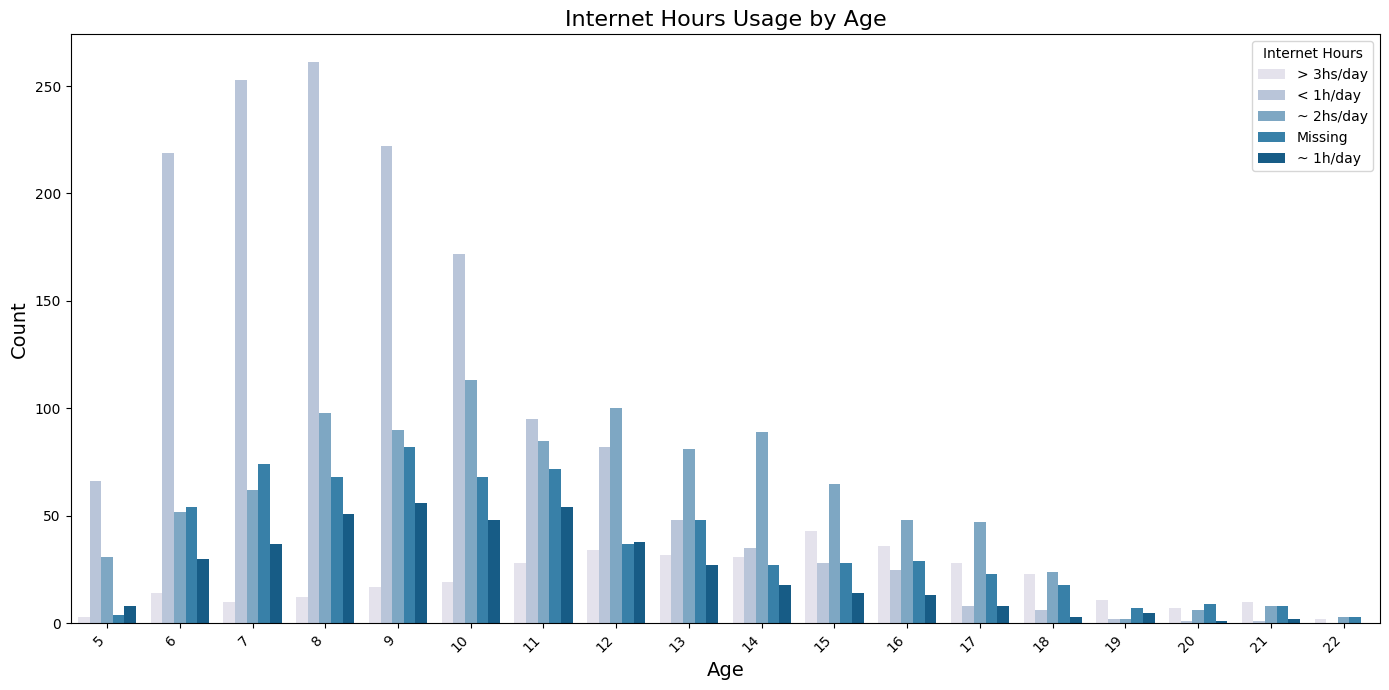

In [15]:
hours_column = 'PreInt_EduHx-computerinternet_hoursday'
age_column = 'Basic_Demos-Age'

plot_df = train[[age_column, hours_column]].copy()
plot_df[hours_column] = plot_df[hours_column].fillna('NaN')
plot_df[hours_column] = plot_df[hours_column].replace({float('NaN'): 'Missing'}).map(legend_mapping)

plt.figure(figsize=(14, 7))
sns.countplot(data=plot_df, x=age_column, hue=hours_column, palette='PuBu')
plt.title('Internet Hours Usage by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Internet Hours', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()